# Comparision the Predications among Those Classifiers
So far, we have explored several classifiers for sentiment analyzer, including NLTK's pre-trained VADER and `NaiveBayesClassifier`, and scikit-learn's `BernoulliNB`, `ComplementNB`, `MultinomialNB`, `DecisionTreeClassifier`, `LogisticRegression`, and `RandomForestClassifier`. Given such flexibility of choice of classifiers, we are going to compare their performance side-by-side and draw a suggestion of the use in our dataset.

## Loading Libraries and Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
url = 'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/data/all_reviews.csv'
df = pd.read_csv(url)[['review', 'rating']].dropna()
df = df.reset_index(drop=True)
df.head()

,review,rating
0,My family took the tour ( BUY TICKETS IN ADVAN...,5.0
1,This is a must stop if you are in San Fran!!! ...,5.0
2,I did not expect to enjoy the tour as much as ...,5.0
3,San Francisco is completely unsafe. We bought ...,1.0
4,I had a 13-hour layover in San Francisco And I...,4.0


## Loading the Predictions

In [3]:
act = pd.DataFrame(df.rating > 3)
BernoulliNB_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/BernoulliNB_pred.csv')
ComplementNB_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/ComplementNB_pred.csv')
DecisionTreeClassifier_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/DecisionTreeClassifier_pred.csv')
LogisticRegression_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/LogisticRegression_pred.csv')
MultinomialNB_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/MultinomialNB_pred.csv')
RandomForestClassifier_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/RandomForestClassifier_pred.csv')
naive_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/naive_pred.csv')
nltk_NaiveBayesClassifier_pred = pd.read_csv(
    'https://raw.githubusercontent.com/yanyuchen/sentiment-analysis/main/output/nltk.NaiveBayesClassifier_pred.csv')

## Confusion Matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa. We then plot the confusion matrix for each classifiers individually. 

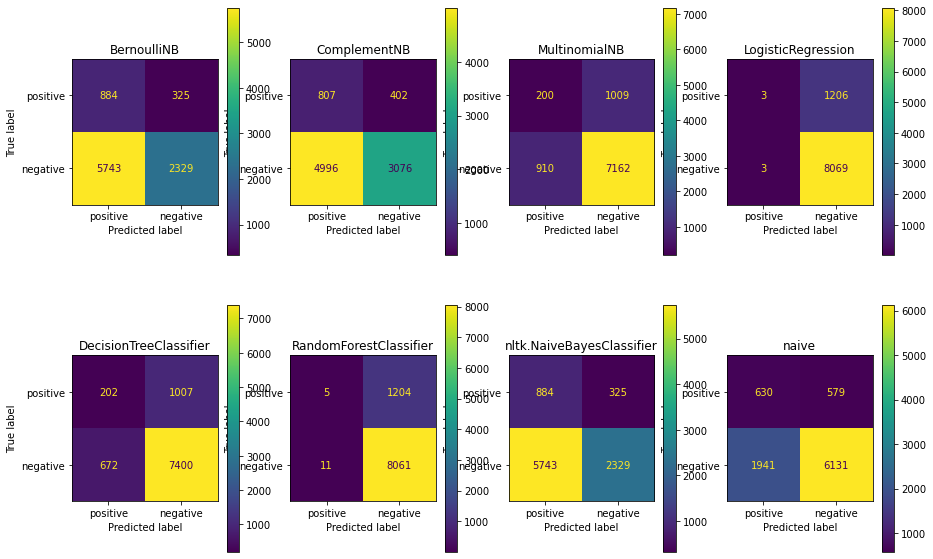

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
ax[0, 0].set_title("BernoulliNB")
ax[0, 1].set_title("ComplementNB")
ax[0, 2].set_title("MultinomialNB")
ax[0, 3].set_title("LogisticRegression")
ax[1, 0].set_title("DecisionTreeClassifier")
ax[1, 1].set_title("RandomForestClassifier")
ax[1, 2].set_title("nltk.NaiveBayesClassifier")
ax[1, 3].set_title("naive")

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, BernoulliNB_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[0, 0])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, ComplementNB_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[0, 1])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, MultinomialNB_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[0, 2])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, LogisticRegression_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[0, 3])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, DecisionTreeClassifier_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[1, 0])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, RandomForestClassifier_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[1, 1])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, nltk_NaiveBayesClassifier_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[1, 2])
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(act, naive_pred), 
                       display_labels = ['positive', 'negative']).plot(ax=ax[1, 3])
fig.show()

The confussion matrix suggests `MultinomialNB`, `DecisionTreeClassifier`, `LogisticRegression`, and `RandomForestClassifier` are relatively compatiable to each other. However, if the cost of the false negative rate (FNR) is higher than the false positive rate (FPR), or one prefers FPR and FNR should be closed to each other. Then, one may end up choosing `DecisionTreeClassifier` and `RandomForestClassifier`. For time-effcient perspective, `DecisionTreeClassifier` is further better than `RandomForestClassifier`.